In [ ]:
Name - Sankalp Manchekar 
Roll no- 35
Class - BE IT B2
Title - Object detection using Transfer Learning of CNN architectures 
a. Load in a pre-trained CNN model trained on a large dataset 
b. Freeze parameters (weights) in model’s lower convolutional layers 
c. Add custom classifier with several layers of trainable parameters to model 
d. Train classifier layers on training data available for task 
e. Fine-tune hyper parameters and unfreeze more layers as needed

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

C:\Users\sanka\anaconda3\lib\site-packages\requests\__init__.py:89: RequestsDependencyWarning: urllib3 (2.2.3) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [2]:
train_dir = "C:/Users/sanka/OneDrive/Desktop/Data sets/cifar-10-img/cifar-10-img/train"
test_dir = "C:/Users/sanka/OneDrive/Desktop/Data sets/cifar-10-img/cifar-10-img/test"

In [3]:
train_dir

'C:/Users/sanka/OneDrive/Desktop/Data sets/cifar-10-img/cifar-10-img/train'

In [4]:
test_dir

'C:/Users/sanka/OneDrive/Desktop/Data sets/cifar-10-img/cifar-10-img/test'

In [5]:
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
)

test_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
)


In [6]:
# here batch_size is the number of images in each batch

train_batch_size = 5000
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(32, 32),
    batch_size=train_batch_size,
    class_mode='categorical'
)

test_batch_size = 1000
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(32, 32),
    batch_size=test_batch_size,
    class_mode='categorical'
)

Found 40079 images belonging to 10 classes.
Found 9921 images belonging to 10 classes.


In [7]:
x_train, y_train =  train_generator[0]
x_test, y_test = test_generator[0]

print(len(x_train))
print(len(x_test))

5000
1000


In [8]:
# Load VGG16 without top layers
weights_path = "vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5"
base_model = VGG16(weights=weights_path, include_top=False, input_shape=(32, 32, 3))

In [9]:
for layer in base_model.layers:
   layer.trainable = False

In [10]:
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = tf.keras.layers.Dropout(0.3)(x)
x = Dense(256, activation='relu')(x)
x = tf.keras.layers.Dropout(0.3)(x)
predictions = Dense(10, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)
# Compile the model
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
# Train the model
model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
79/79 [==============================] - 20s 249ms/step - loss: 1.9585 - accuracy: 0.3034 - val_loss: 1.5953 - val_accuracy: 0.4590
Epoch 2/10
79/79 [==============================] - 18s 223ms/step - loss: 1.5787 - accuracy: 0.4440 - val_loss: 1.4498 - val_accuracy: 0.4990
Epoch 3/10
79/79 [==============================] - 18s 224ms/step - loss: 1.4612 - accuracy: 0.4852 - val_loss: 1.3657 - val_accuracy: 0.5410
Epoch 4/10
79/79 [==============================] - 19s 235ms/step - loss: 1.3683 - accuracy: 0.5156 - val_loss: 1.3115 - val_accuracy: 0.5580
Epoch 5/10
79/79 [==============================] - 16s 197ms/step - loss: 1.2856 - accuracy: 0.5424 - val_loss: 1.3732 - val_accuracy: 0.5240
Epoch 6/10
79/79 [==============================] - 16s 199ms/step - loss: 1.2533 - accuracy: 0.5616 - val_loss: 1.3063 - val_accuracy: 0.5550
Epoch 7/10
79/79 [==============================] - 16s 198ms/step - loss: 1.1820 - accuracy: 0.5876 - val_loss: 1.2719 - val_accuracy: 0.5610

In [12]:
base_model = VGG16(weights=weights_path, include_top=False, input_shape=(32, 32, 3))
# freeze all layers first
for layer in base_model.layers:
   layer.trainable = False
# unfreeze last 4 layers of base model
for layer in base_model.layers[len(base_model.layers) - 4:]:
   layer.trainable = True
# fine-tuning hyper parameters
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = tf.keras.layers.Dropout(0.3)(x)
x = Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.3)(x)
predictions = Dense(10, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
# training fine tuned model
model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
79/79 [==============================] - 49s 608ms/step - loss: 1.9784 - accuracy: 0.2556 - val_loss: 1.4228 - val_accuracy: 0.5060
Epoch 2/10
79/79 [==============================] - 48s 612ms/step - loss: 1.3392 - accuracy: 0.5314 - val_loss: 1.2556 - val_accuracy: 0.5620
Epoch 3/10
79/79 [==============================] - 46s 589ms/step - loss: 1.0812 - accuracy: 0.6280 - val_loss: 1.2446 - val_accuracy: 0.6020
Epoch 4/10
79/79 [==============================] - 46s 588ms/step - loss: 0.9124 - accuracy: 0.6864 - val_loss: 1.1299 - val_accuracy: 0.6360
Epoch 5/10
79/79 [==============================] - 46s 589ms/step - loss: 0.7689 - accuracy: 0.7438 - val_loss: 1.1596 - val_accuracy: 0.6400
Epoch 6/10
79/79 [==============================] - 47s 601ms/step - loss: 0.6404 - accuracy: 0.7838 - val_loss: 1.1553 - val_accuracy: 0.6500
Epoch 7/10
79/79 [==============================] - 46s 581ms/step - loss: 0.6092 - accuracy: 0.7936 - val_loss: 1.3129 - val_accuracy: 0.6320

In [13]:
import matplotlib.pyplot as plt
predicted_value = model.predict(x_test)

32/32 [==============================] - 3s 96ms/step


In [14]:
labels = list(test_generator.class_indices.keys())

Preditcted:  truck
Actual:  truck


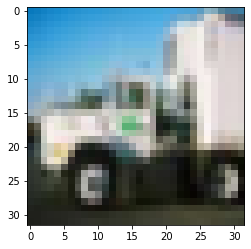

In [17]:
n=945
plt.imshow(x_test[n])
print("Preditcted: ",labels[np.argmax(predicted_value[n])])
print("Actual: ", labels[np.argmax(y_test[n])])

Preditcted:  horse
Actual:  ship


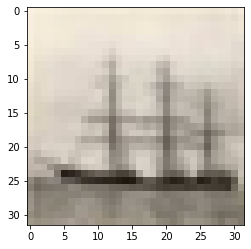

In [18]:
n=9
plt.imshow(x_test[n])
print("Preditcted: ",labels[np.argmax(predicted_value[n])])
print("Actual: ", labels[np.argmax(y_test[n])])

Preditcted:  deer
Actual:  deer


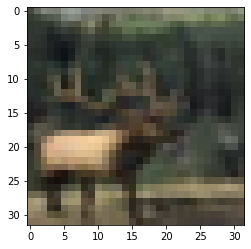

In [20]:
n=5
plt.imshow(x_test[n])
print("Preditcted: ",labels[np.argmax(predicted_value[n])])
print("Actual: ", labels[np.argmax(y_test[n])])